In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Load and Clean Data

In [2]:
df = pd.read_csv('parkinsons.csv')
selected_columns = ['Molecular Weight', '#RO5 Violations','Smiles', 'AlogP', 'pChEMBL Value']
columns_to_check = ['Molecular Weight', '#RO5 Violations', 'AlogP', 'pChEMBL Value']
for col in columns_to_check:
    df = df[pd.to_numeric(df[col], errors='coerce').notnull()]
df_selected = df[selected_columns].dropna()
ary = df_selected[['Molecular Weight', '#RO5 Violations', 'AlogP','pChEMBL Value']].values.astype(float).T


/tmp/ipykernel_8839/69791468.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('parkinsons.csv')


In [3]:
print('Size of full dataset after removing invalid entries:',len(df_selected))

Size of full dataset after removing invalid entries: 11774


## Plots

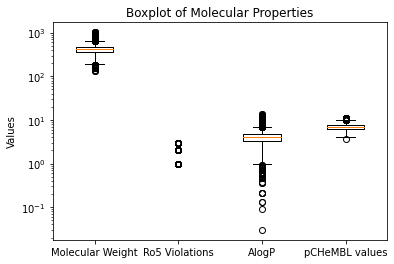

In [4]:
mol_wt = ary[0]
r05 = ary[1]
alogp = ary[2]
pchem = ary[3]

plt.boxplot([mol_wt,r05,alogp,pchem])

plt.title('Boxplot of Molecular Properties')
plt.ylabel('Values')
plt.xticks(ticks=[1,2,3,4], labels=['Molecular Weight','Ro5 Violations','AlogP','pCHeMBL values']);
plt.yscale('log')

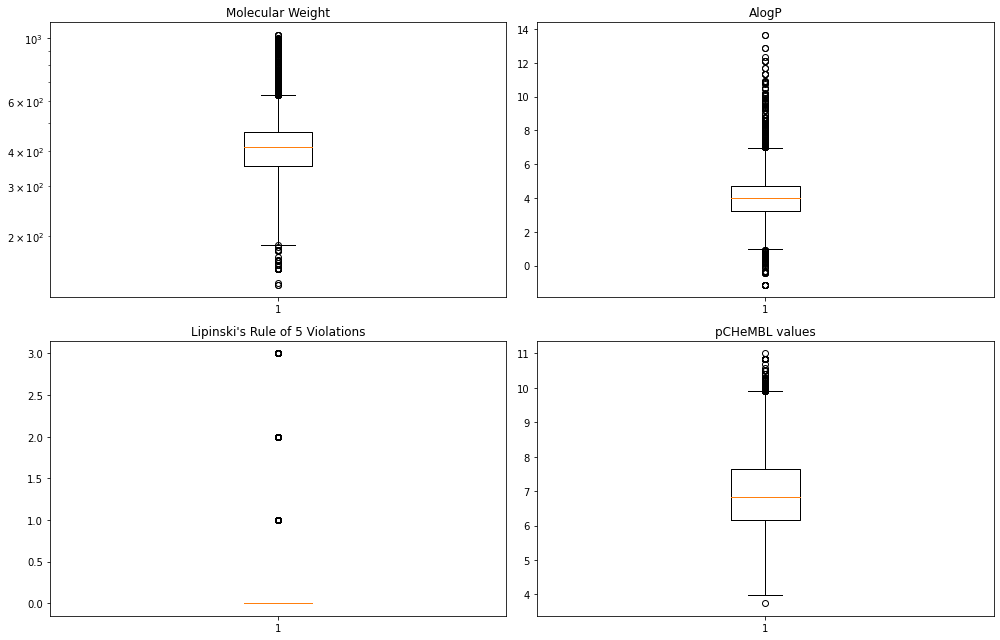

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 9))

axes[0,0].boxplot(mol_wt)
axes[0,0].set_title('Molecular Weight')
axes[0,0].set_yscale('log')

axes[1,0].boxplot(r05)
axes[1,0].set_title("Lipinski's Rule of 5 Violations")

axes[0,1].boxplot(alogp)
axes[0,1].set_title('AlogP')

axes[1,1].boxplot(pchem)
axes[1,1].set_title('pCHeMBL values')

plt.tight_layout()